In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [21]:
data = pd.read_csv("Ship_Performance_Dataset.csv")
data.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [23]:
data.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.dtypes

Date                        object
Ship_Type                   object
Route_Type                  object
Engine_Type                 object
Maintenance_Status          object
Speed_Over_Ground_knots    float64
Engine_Power_kW            float64
Distance_Traveled_nm       float64
Draft_meters               float64
Weather_Condition           object
Cargo_Weight_tons          float64
Operational_Cost_USD       float64
Revenue_per_Voyage_USD     float64
Turnaround_Time_hours      float64
Efficiency_nm_per_kWh      float64
Seasonal_Impact_Score      float64
Weekly_Voyage_Count          int64
Average_Load_Percentage    float64
dtype: object

In [26]:
data.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000
mean,17.606620,1750.937650,1038.979949,9.961135,1033.466859,257042.246655,523427.583448,41.773758,0.789907,1.001564,4.905971,75.127589
std,4.358035,714.510707,566.964336,2.843848,557.643284,140640.549548,269842.456183,17.641702,0.403117,0.289193,2.607536,14.491095
min,10.009756,501.739027,50.433150,5.001947,50.229624,10097.439656,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.901849,1140.312110,559.500880,7.475897,557.071885,133864.243330,292183.911075,26.312659,0.455310,0.752892,3.000000,62.510270
50%,17.709557,1755.420863,1037.646044,10.001622,1045.366596,259124.728516,524083.139296,41.533238,0.774962,1.007639,5.000000,75.159377
75%,21.317888,2364.977047,1541.193201,12.393851,1526.149743,384452.537643,752933.741950,57.558671,1.136306,1.250343,7.000000,87.687832
max,24.991661,2998.734329,1998.337057,14.989905,1999.126697,499734.867868,999811.927756,71.972415,1.498191,1.499224,9.000000,99.952220


In [27]:
data.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898


In [28]:
#Encode kolom Gender

categorical = ["Ship_Type", "Route_Type", "Engine_Type", "Maintenance_Status", "Weather_Condition"]

from sklearn.preprocessing import LabelEncoder

for i in categorical:
    label_encoder = LabelEncoder()
    data[i] = label_encoder.fit_transform(data[i])
data

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2023-06-11,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,2,1,1,1,18.616196,2171.646567,723.304215,14.916320,2,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,2024-05-19,1,1,1,2,24.257402,1813.474360,147.964296,10.378736,1,1450.181358,266359.224719,820652.038923,34.433655,0.708172,1.352973,7,51.258697
2730,2024-05-26,3,1,0,0,15.649207,1662.426557,1175.942724,12.564046,2,451.670997,393827.995941,567287.169653,22.281638,0.356031,1.079178,2,92.926949
2731,2024-06-02,3,2,1,2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2734,2024-06-23,3,3,1,2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


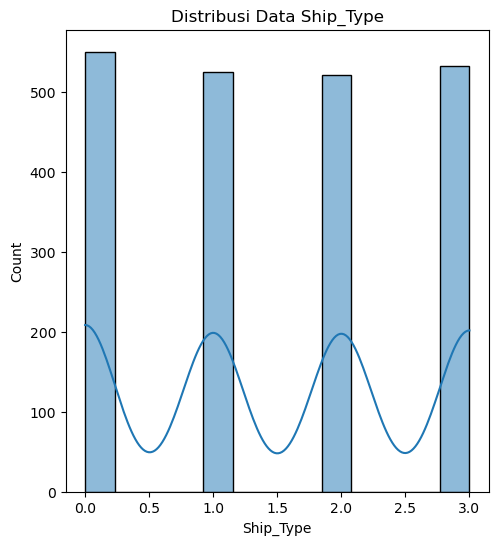

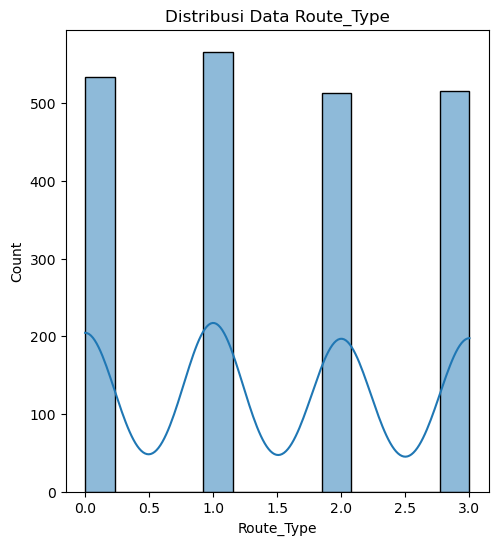

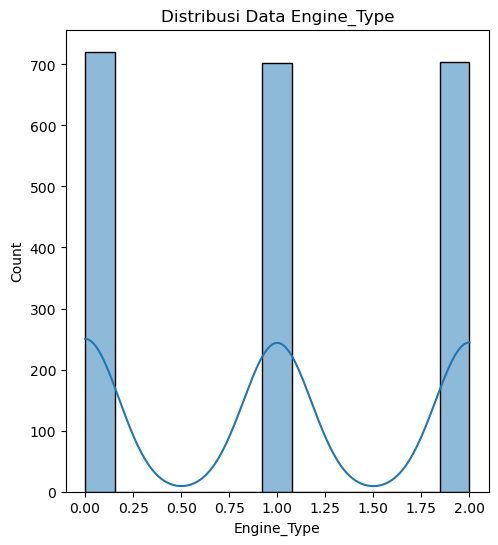

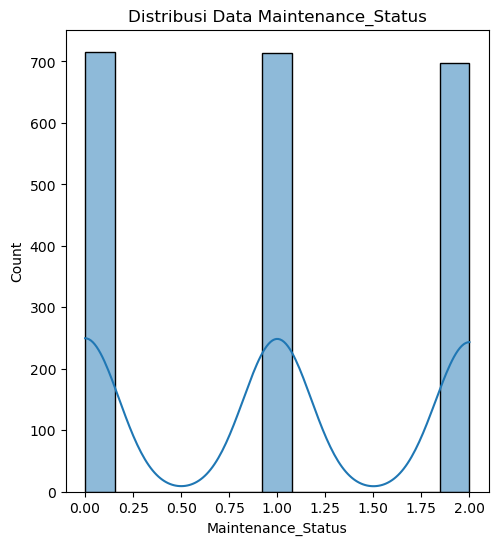

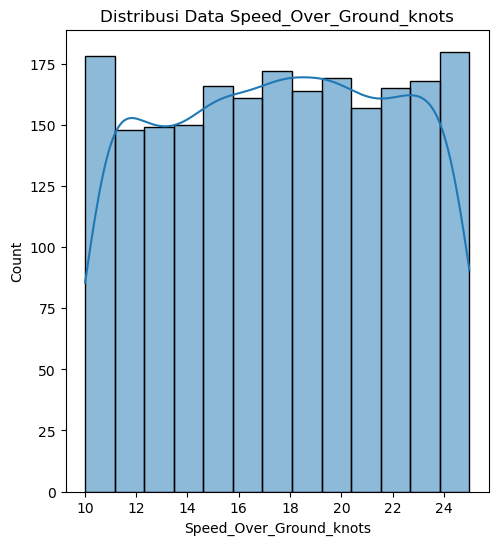

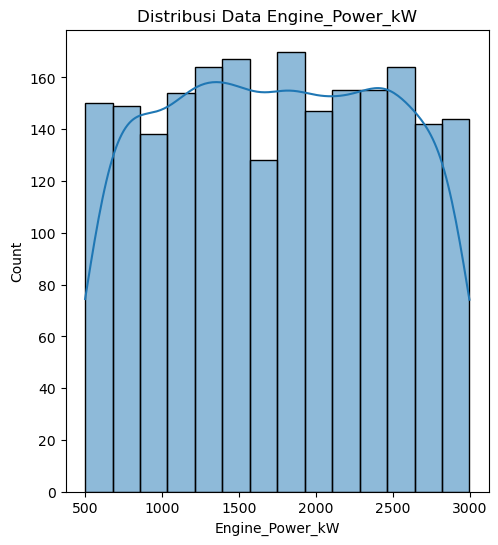

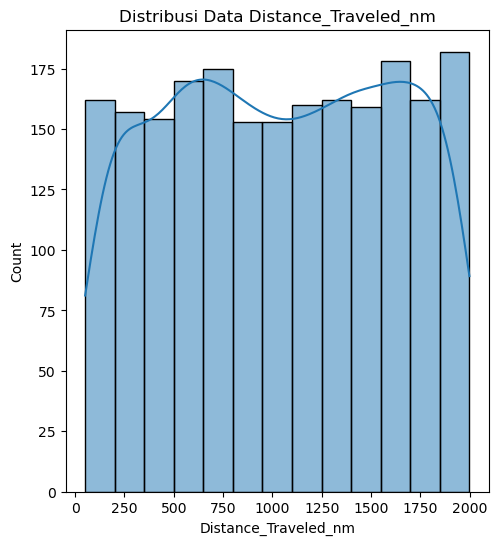

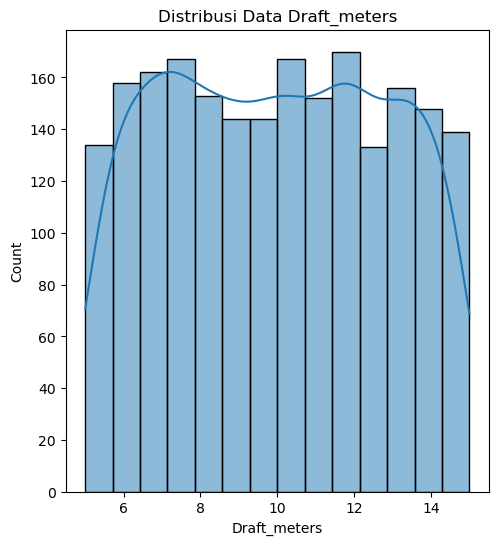

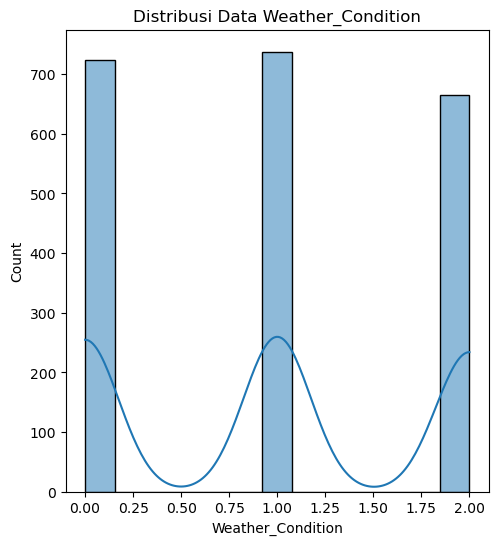

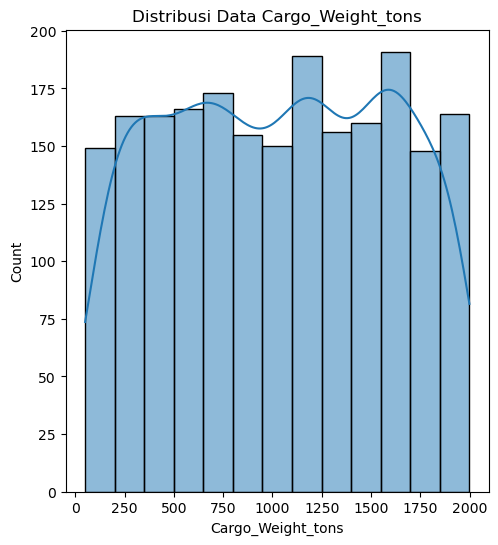

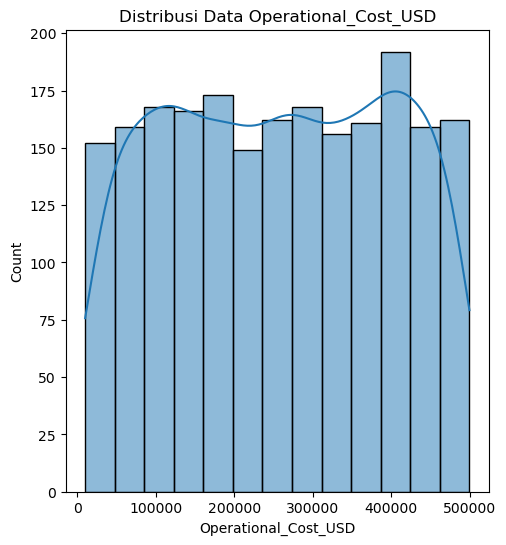

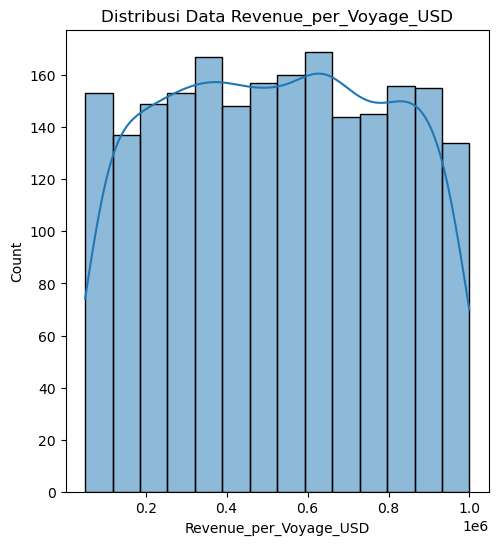

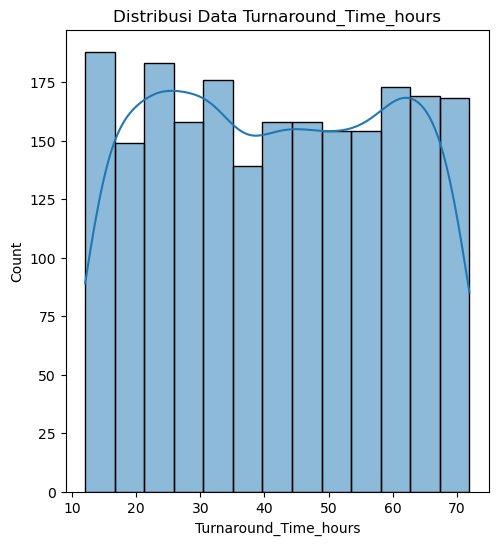

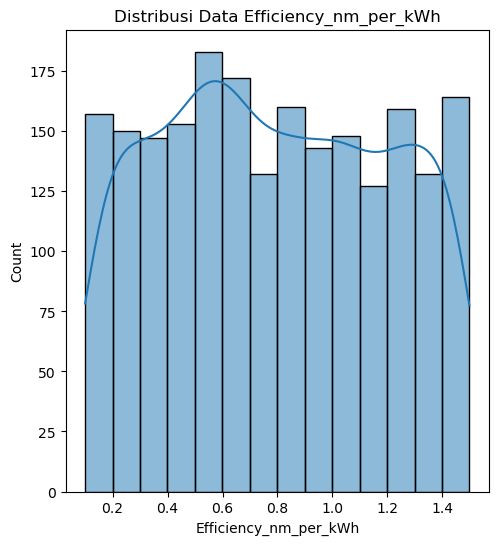

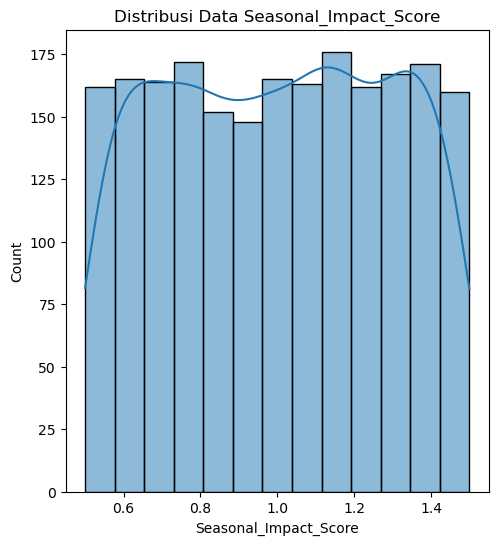

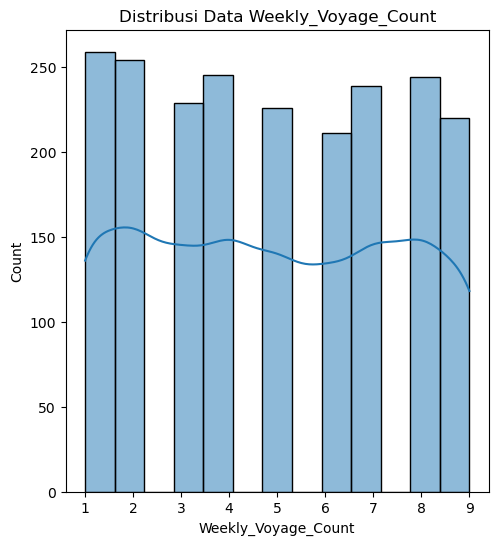

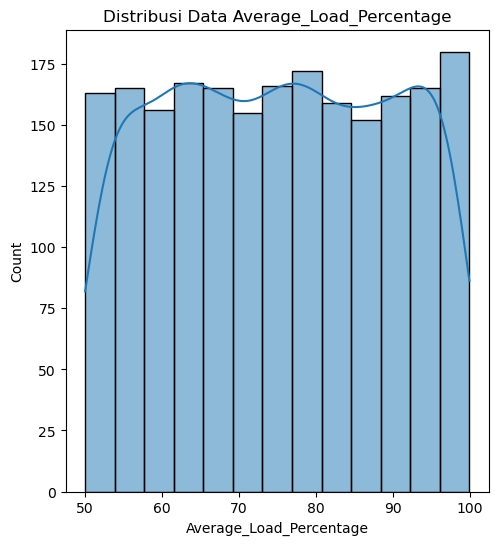

In [29]:
columns = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage']

for i in columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[i], kde=True)
    plt.title(f'Distribusi Data {i}')

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


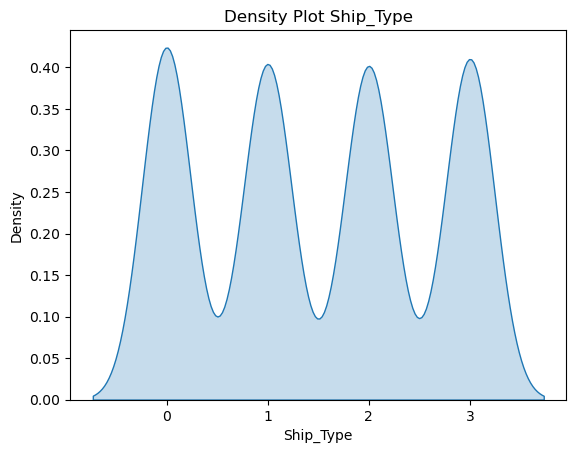

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


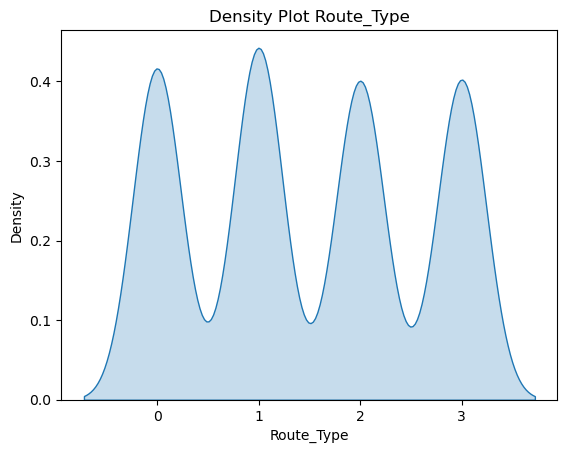

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


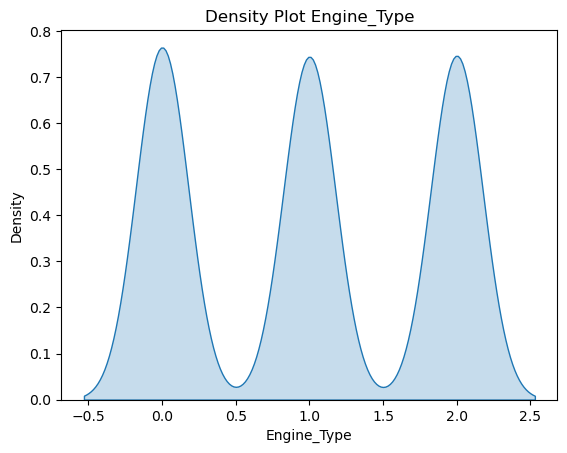

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


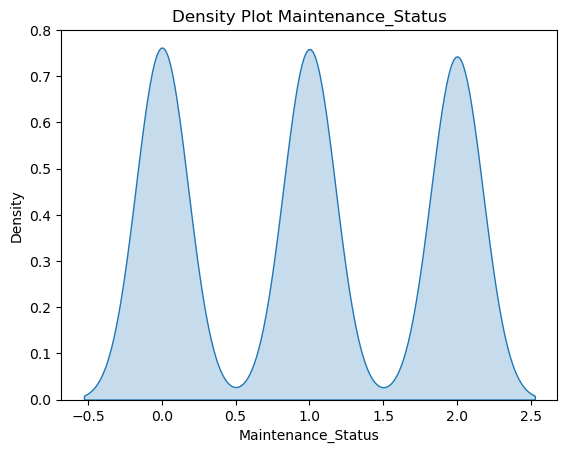

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


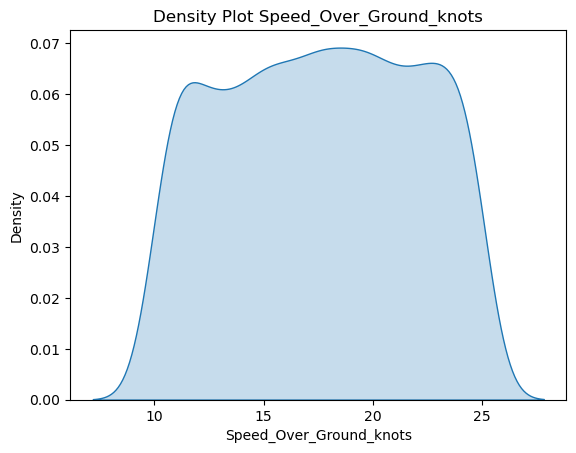

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


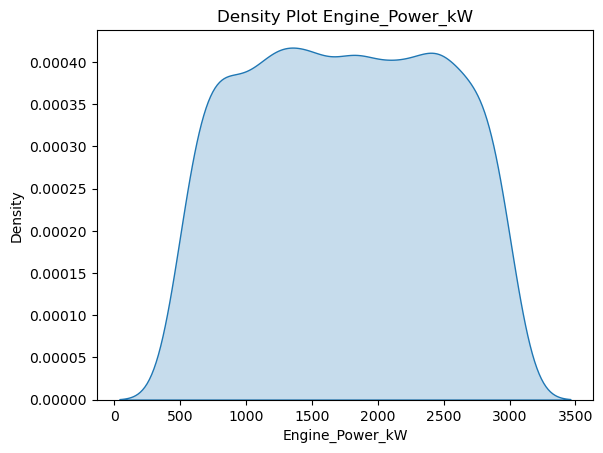

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


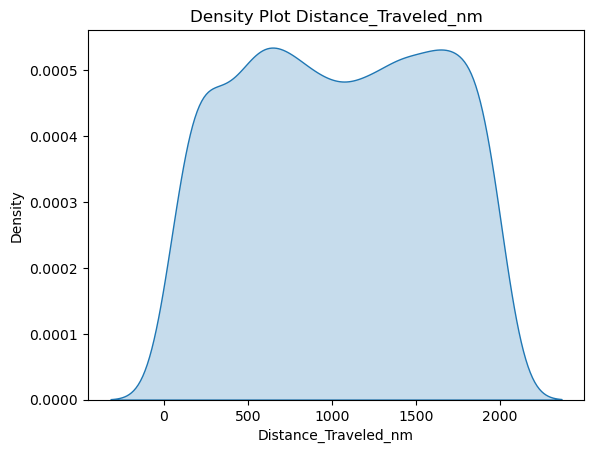

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


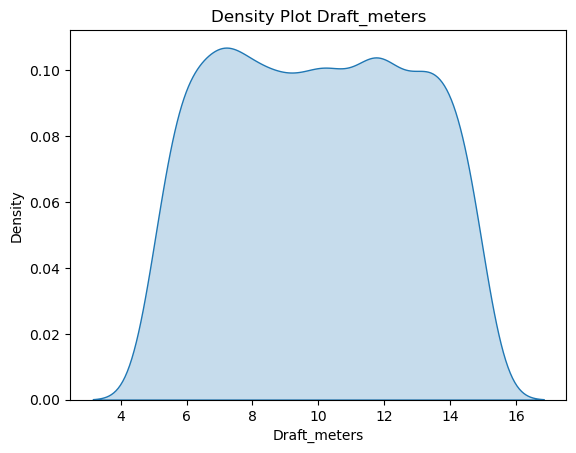

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


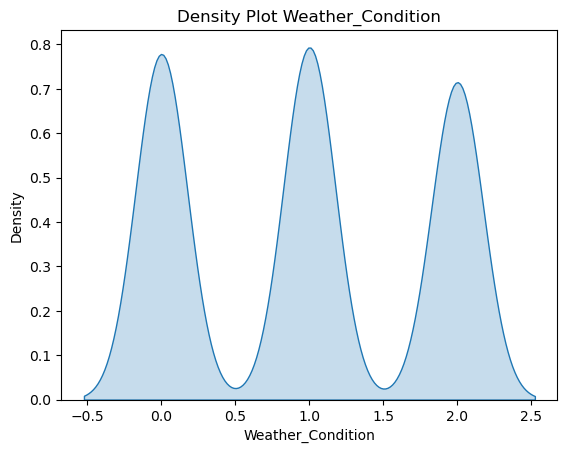

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


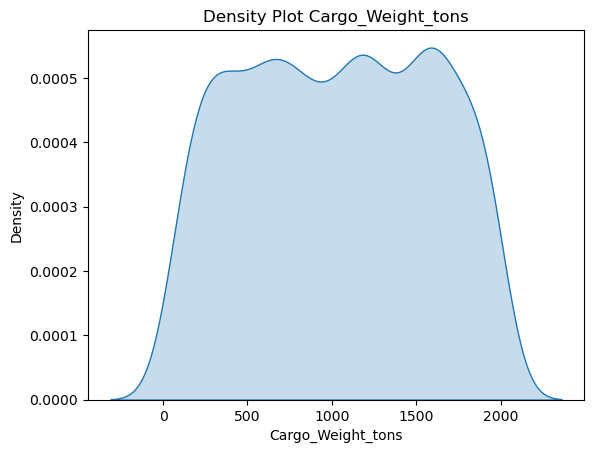

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


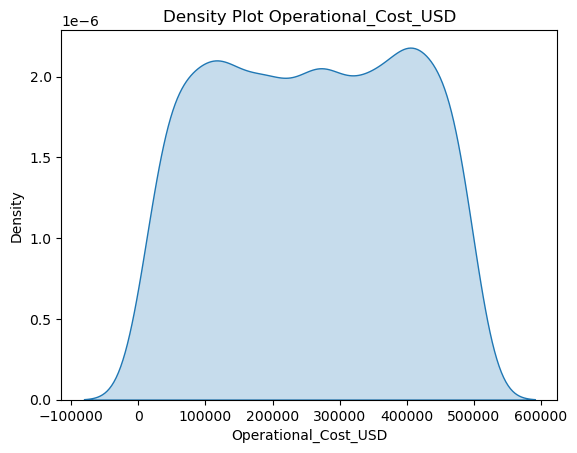

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


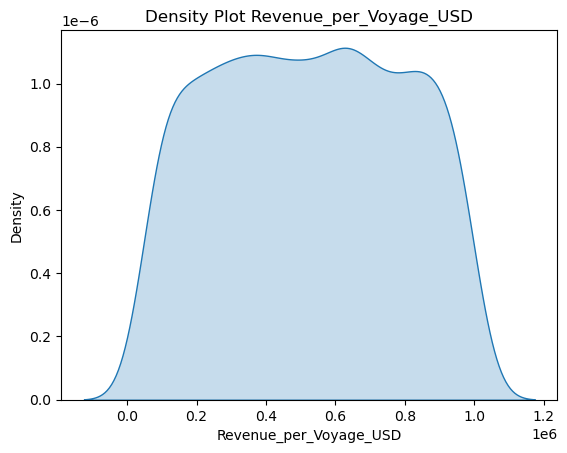

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


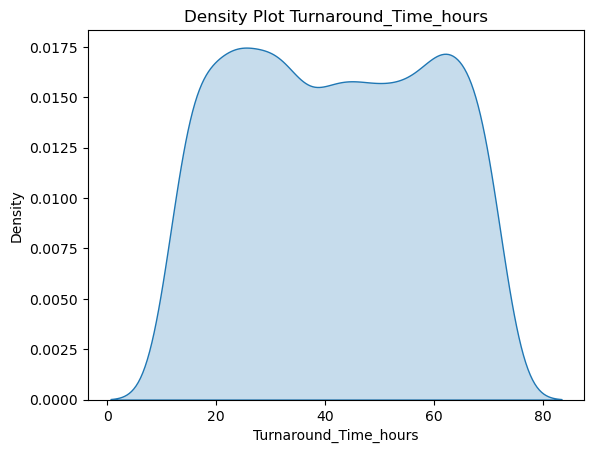

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


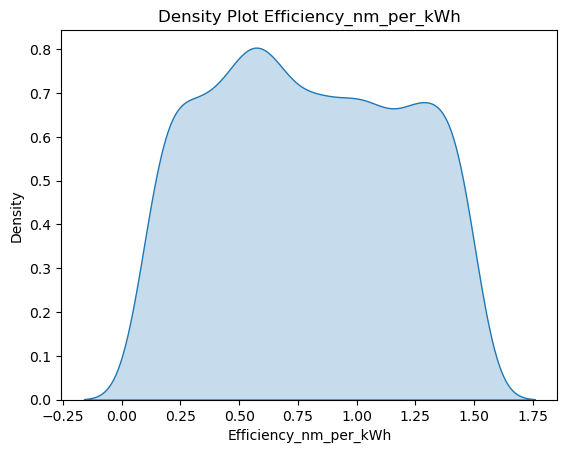

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


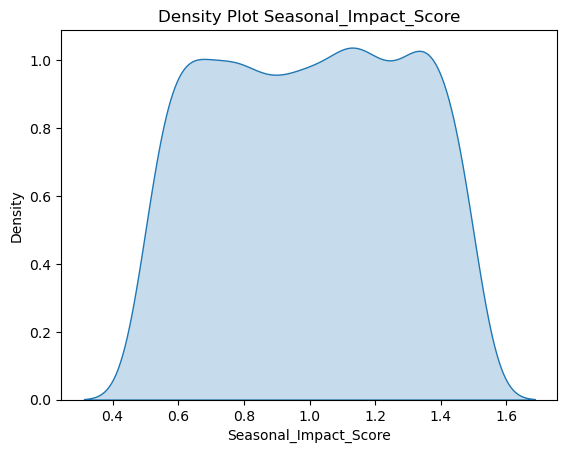

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


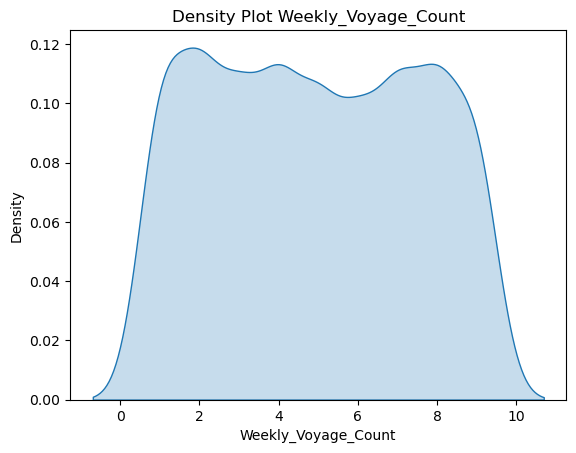

C:\Users\sunka\AppData\Local\Temp\ipykernel_16692\1385085131.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[j], shade=True, )


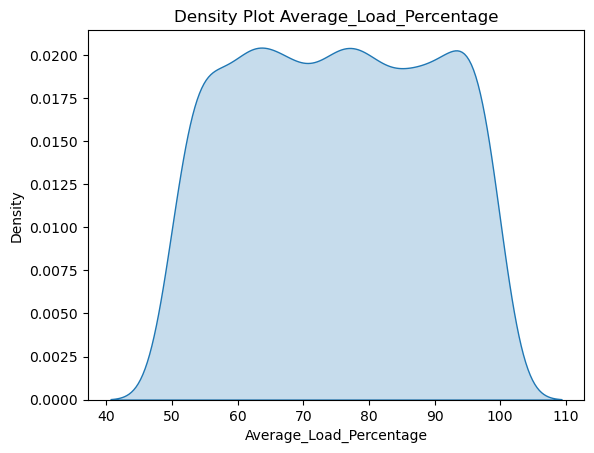

In [30]:
for j in columns:
    sns.kdeplot(data[j], shade=True, )
    plt.title(f'Density Plot {j}')
    plt.show()

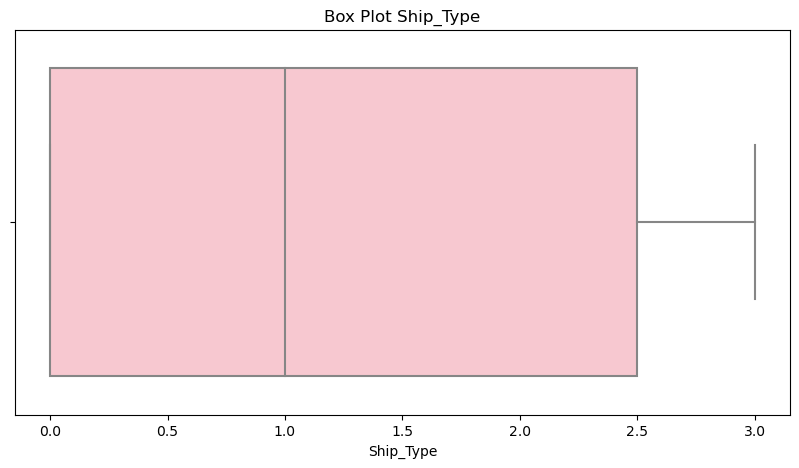

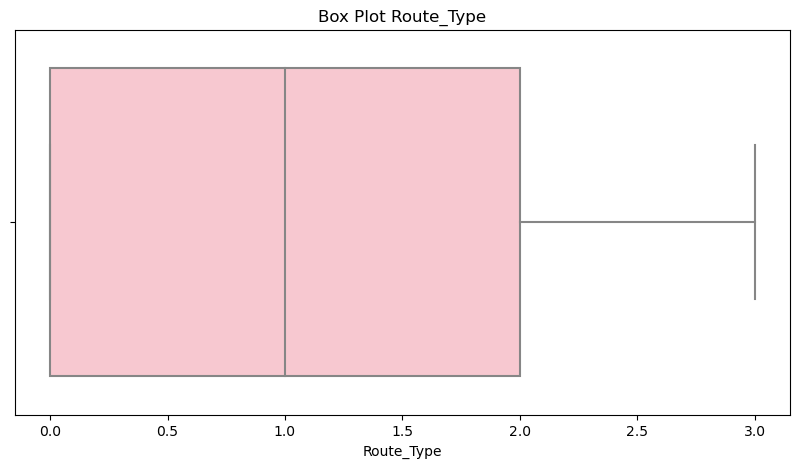

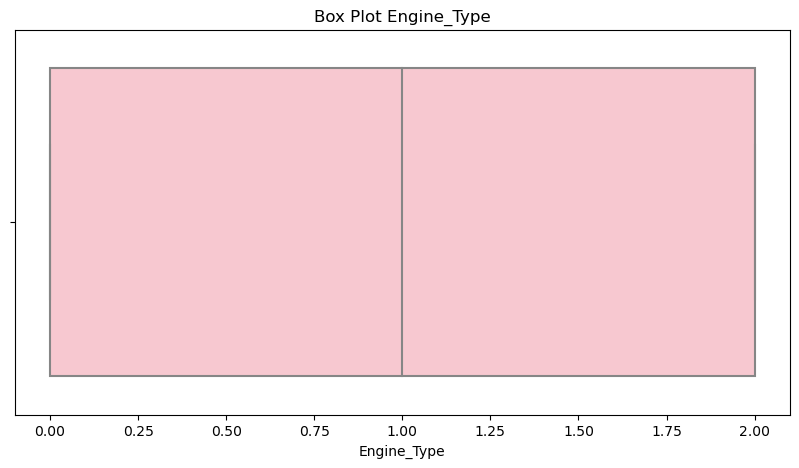

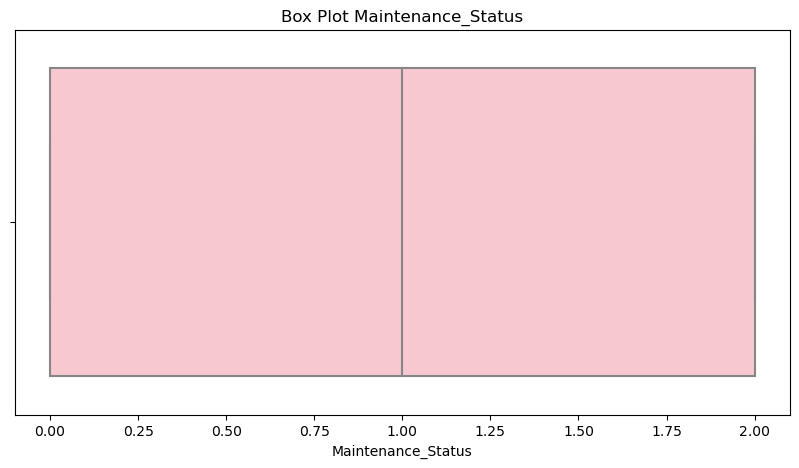

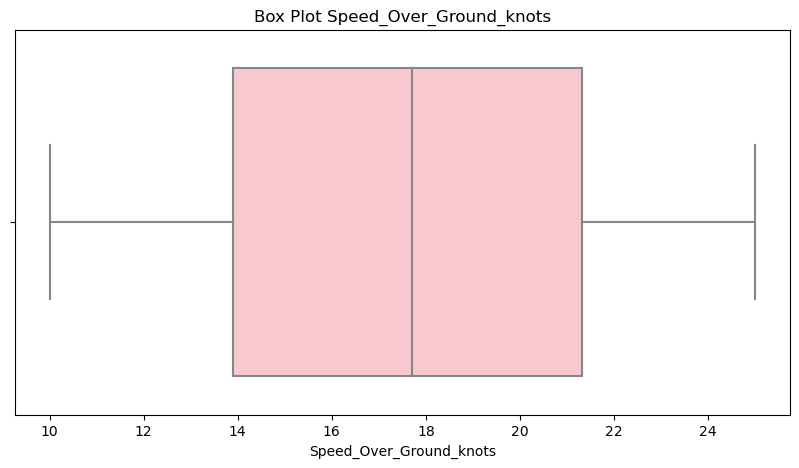

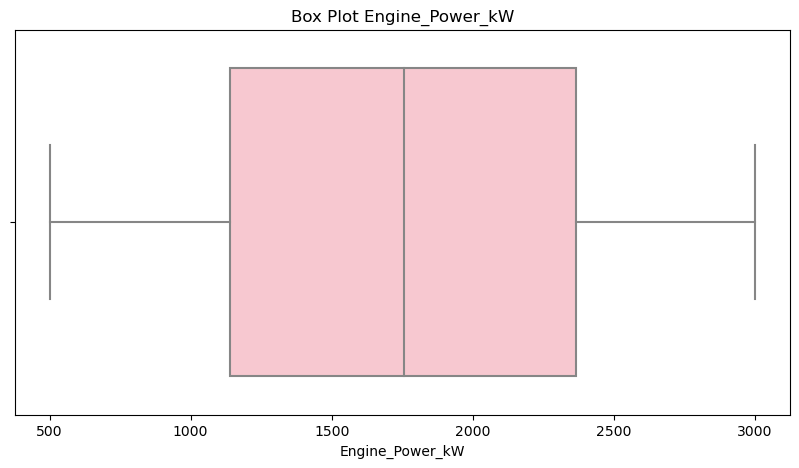

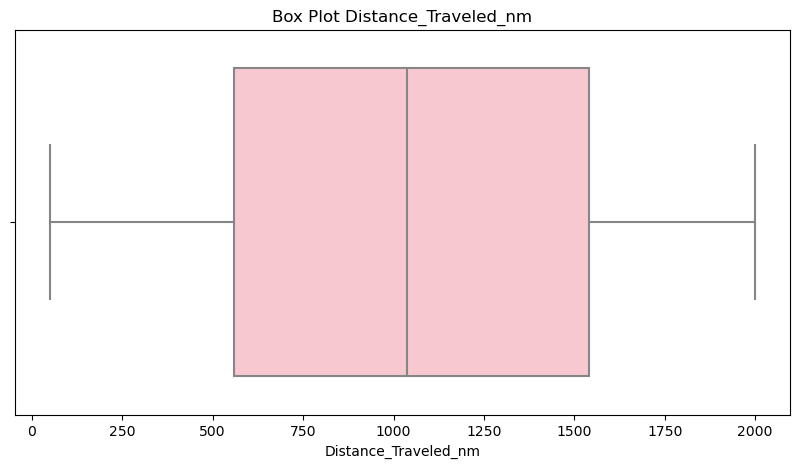

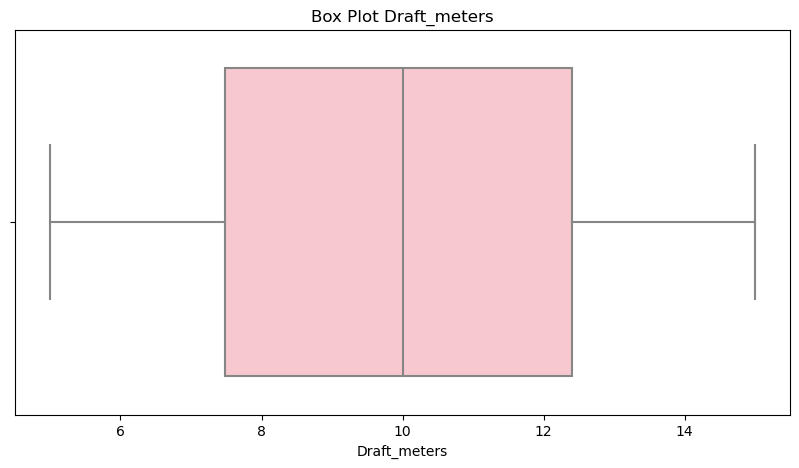

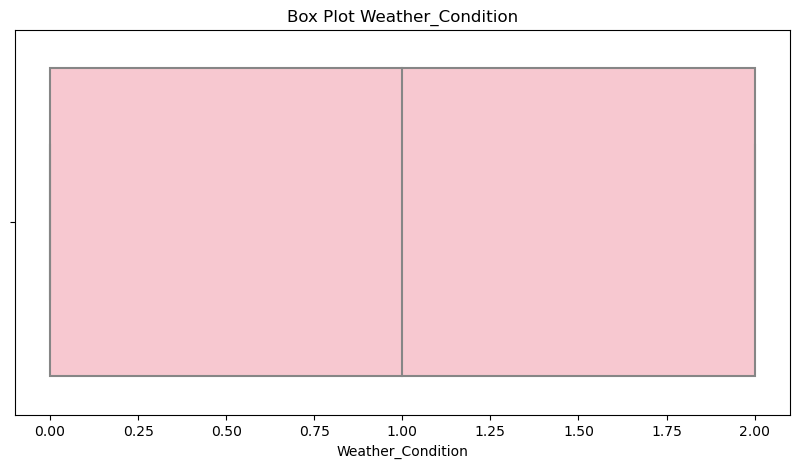

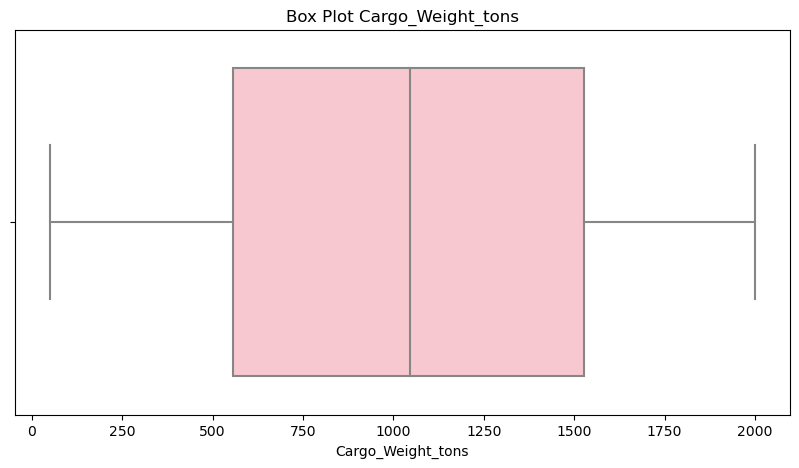

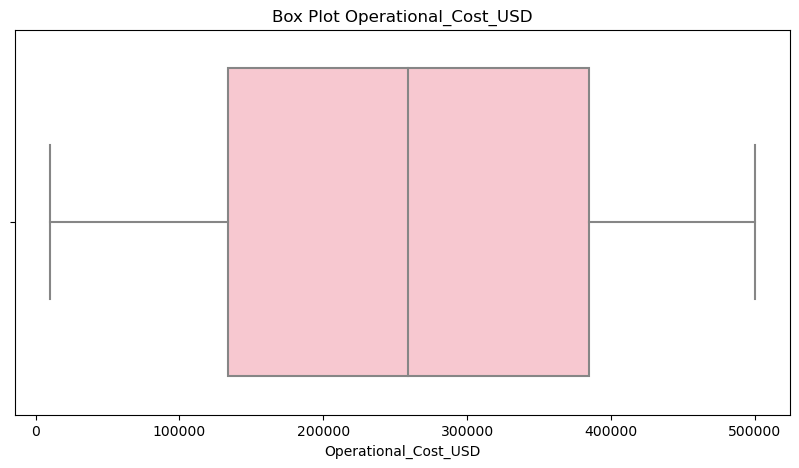

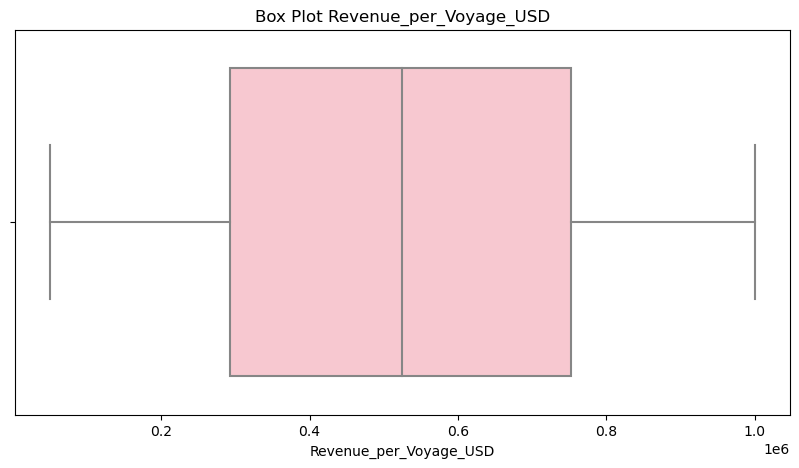

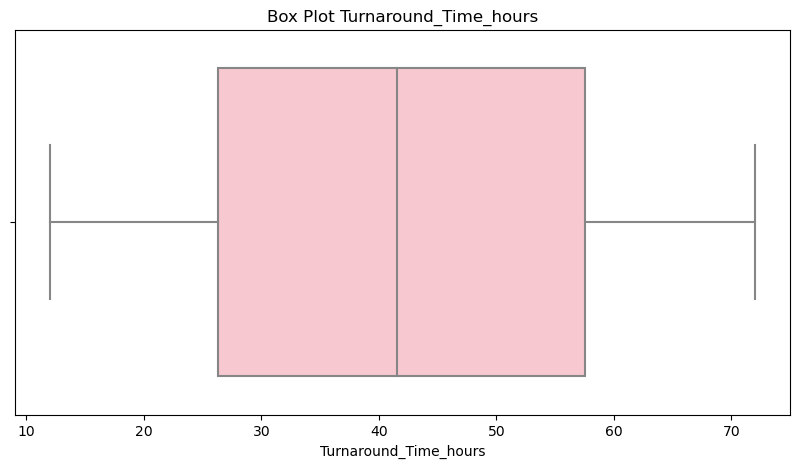

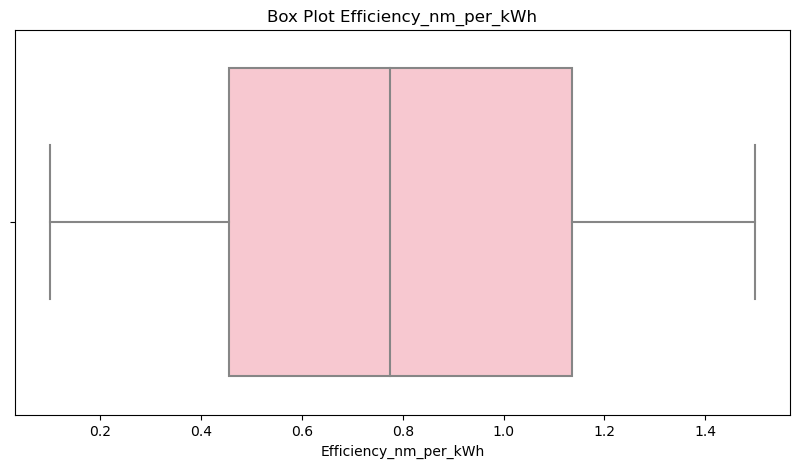

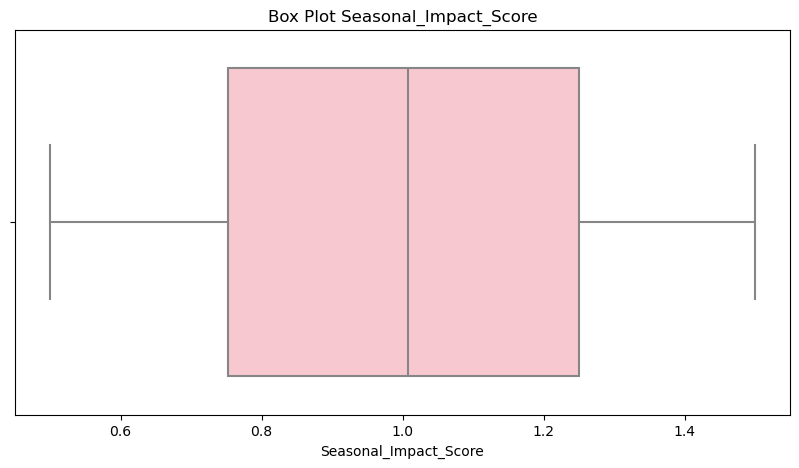

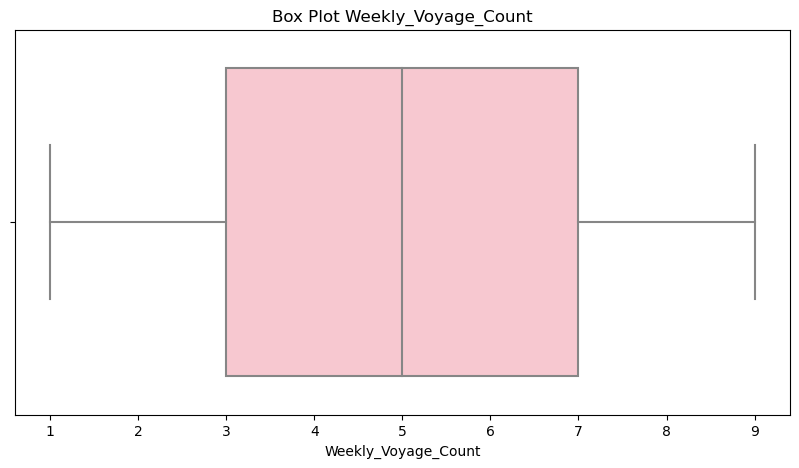

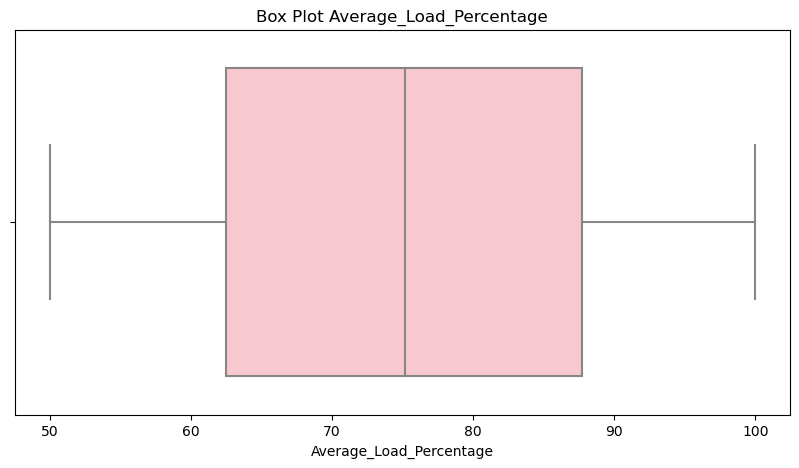

In [31]:
for k in columns:
    plt.figure(figsize=(10, 5))     
    sns.boxplot(x=data[k], color='pink')     
    plt.title(f'Box Plot {k}')
    plt.show()

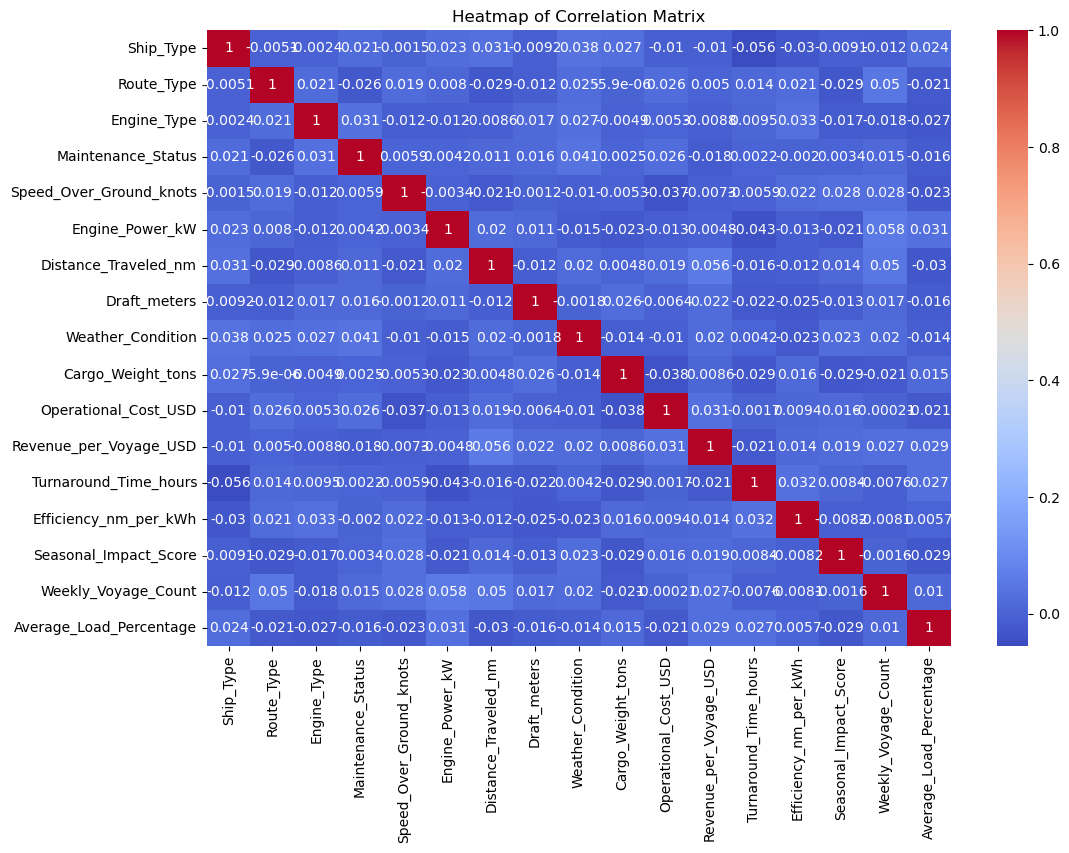

In [32]:
plt.figure(figsize=(12, 8))

corr_matrix = data.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [33]:
# Pilih fitur
data['estimated_energy_used'] = data['Distance_Traveled_nm']/data['Efficiency_nm_per_kWh']
features = ['estimated_energy_used',
            'Efficiency_nm_per_kWh']
X = data[features].values

# Normalisasi manual (standardization)
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

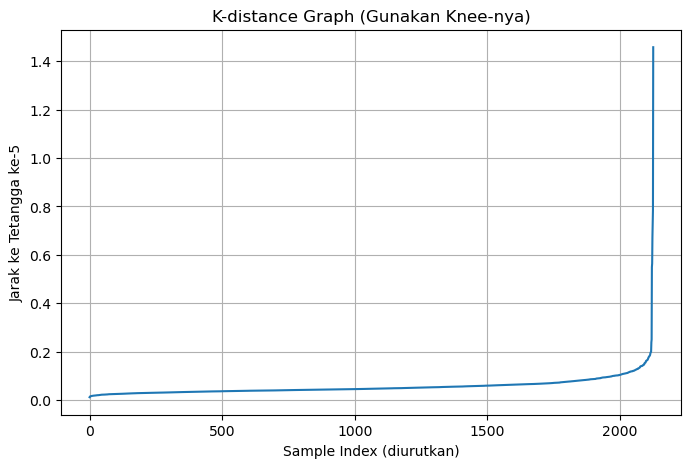

In [34]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ambil jarak ke tetangga ke-5 dan urutkan
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("K-distance Graph (Gunakan Knee-nya)")
plt.xlabel("Sample Index (diurutkan)")
plt.ylabel("Jarak ke Tetangga ke-5")
plt.grid()
plt.show()

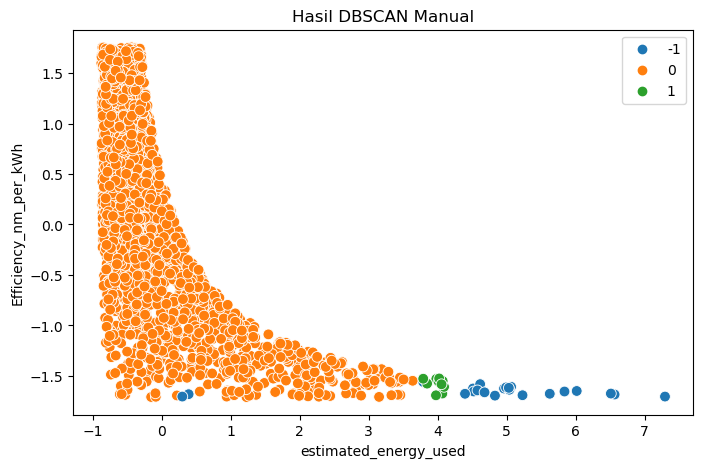

Jumlah klaster (tidak termasuk noise): 2
Jumlah noise: 23


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (anggap file udah ada)
data = pd.read_csv("Ship_Performance_Dataset.csv")
data.dropna(inplace=True)

# Encode kategorikal
categorical = ["Ship_Type", "Route_Type", "Engine_Type", "Maintenance_Status", "Weather_Condition"]
for col in categorical:
    unique = list(data[col].unique())
    data[col] = data[col].apply(lambda x: unique.index(x))

# --- DBSCAN Manual ---
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples, visited):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if not visited[neighbor_idx]:
            visited[neighbor_idx] = True
            neighbor_neighbors = region_query(X, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors += neighbor_neighbors
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        i += 1

def dbscan_manual(X, eps, min_samples):
    n = len(X)
    labels = [-1] * n  # -1 = noise
    visited = [False] * n
    cluster_id = 0

    for point_idx in range(n):
        if visited[point_idx]:
            continue
        visited[point_idx] = True
        neighbors = region_query(X, point_idx, eps)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples, visited)
            cluster_id += 1
    return labels

# Jalankan DBSCAN manual
eps = 0.19
min_samples = 10
dbscan_labels = dbscan_manual(X_scaled, eps, min_samples)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='tab10', s=60)
plt.title("Hasil DBSCAN Manual")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Cek jumlah cluster
print("Jumlah klaster (tidak termasuk noise):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Jumlah noise:", dbscan_labels.count(-1))


In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluasi dengan sklearn
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters >= 1:
    sil_score = silhouette_score(X_scaled, dbscan_labels)
    db_score = davies_bouldin_score(X_scaled, dbscan_labels)
    print("✅ Silhouette Score:", sil_score)
    print("✅ Davies-Bouldin Index:", db_score)
else:
    print("❌ Tidak cukup cluster untuk evaluasi (semua data mungkin noise atau hanya 1 cluster).")

✅ Silhouette Score: 0.6079700249891703
✅ Davies-Bouldin Index: 1.0505259007341008
